In [1]:
packages <- c("edgeR", "dplyr", "magrittr", "ggplot2","anndata","reticulate",
              "tidyr", "reshape", "Seurat", "scales","gplots","reshape2"
              )
lapply(packages, library, character.only = TRUE)

Loading required package: limma


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename


Attaching SeuratObject


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘reshape2’


The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast


The following object is masked from ‘package:tidyr’:

    smiths




[[1]]
[1] "edgeR"     "limma"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[2]]
 [1] "dplyr"     "edgeR"     "limma"     "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "magrittr"  "dplyr"     "edgeR"     "limma"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "ggplot2"   "magrittr"  "dplyr"     "edgeR"     "limma"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "anndata"   "ggplot2"   "magrittr"  "dplyr"     "edgeR"     "limma"    
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "reticulate" "anndata"    "ggplot2"    "magrittr"   "dplyr"     
 [6] "edgeR"      "limma"      "stats"      "graphics"   "grDevices" 
[11] "utils"      "datasets"   "methods"    "base"      

[[7]]
 [1] "tidyr"      "reticulate" "anndata"    "ggplot2"    "magrittr"  
 [6] "dplyr"      "edgeR"      "limma"      "stats"      "graphics"  
[11] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[8]]
 [1] "reshape"    "tidyr"      "reticulate" "anndata"    "ggplot2"   
 [6] "magrittr"   "dplyr"      "edgeR"      "limma"      "stats"     
[11] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[16] "base"      

[[9]]
 [1] "SeuratObject" "Seurat"       "reshape"      "tidyr"        "reticulate"  
 [6] "anndata"      "ggplot2"      "magrittr"     "dplyr"        "edgeR"       
[11] "limma"        "stats"        "graphics"     "grDevices"    "utils"       
[16] "datasets"     "methods"      "base"        

[[10]]
 [1] "scales"       "SeuratObject" "Seurat"       "reshape"      "tidyr"       
 [6] "reticulate"   "anndata"      "ggplot2"      "magrittr"     "dplyr"       
[11] "edgeR"        "limma"        "stats"        "graphics"     "grDevices"   
[16] "utils"        "datasets"     "methods"      "base"        

[[11]]
 [1] "gplots"       "scales"       "SeuratObject" "Seurat"       "reshape"     
 [6] "tidyr"        "reticulate"   "anndata"      "ggplot2"      "magrittr"    
[11] "dplyr"        "edgeR"        "limma"        "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[12]]
 [1] "reshape2"     "gplots"       "scales"       "SeuratObject" "Seurat"      
 [6] "reshape"      "tidyr"        "reticulate"   "anndata"      "ggplot2"     
[11] "magrittr"     "dplyr"        "edgeR"        "limma"        "stats"       
[16] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[21] "base"

In [2]:
h5ad_file <- "./CTCL/object_revision/CTCL1-8_tumorcell_raw.h5ad" ### CTCL1-8: tumours with seperate dermal and epidemal samples
sdata <- read_h5ad(h5ad_file)
Target_subset <- CreateSeuratObject(counts = t(as.matrix(sdata$X)), meta.data = sdata$obs)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.0 GiB”


In [3]:
pseudobulk <- function(seurat_object, column, label){
    seurat_object@meta.data[,column] <- as.character(seurat_object@meta.data[,column])
    tmp <- seurat_object[,seurat_object@meta.data[,column]==label]
    tmp2 <- Matrix::rowSums(tmp@assays$RNA@counts)
    return(tmp2)
}

### column -- donor_id
### label -- each donor

In [4]:
table(Target_subset$donor); table(Target_subset$tissue)


CTCL1 CTCL2 CTCL3 CTCL4 CTCL5 CTCL6 CTCL7 CTCL8 
 8069  1857  9411  1073  7636  3745  3673  7139 


   Dermis Epidermis 
    21975     20628 

In [5]:
Target_subset$donor_tissue <- paste(Target_subset$donor, Target_subset$tissue, sep='_')
table(Target_subset$donor_tissue)


   CTCL1_Dermis CTCL1_Epidermis    CTCL2_Dermis CTCL2_Epidermis    CTCL3_Dermis 
           5332            2737             710            1147            6504 
CTCL3_Epidermis    CTCL4_Dermis CTCL4_Epidermis    CTCL5_Dermis CTCL5_Epidermis 
           2907              67            1006            2459            5177 
   CTCL6_Dermis CTCL6_Epidermis    CTCL7_Dermis CTCL7_Epidermis    CTCL8_Dermis 
            403            3342             544            3129            5956 
CTCL8_Epidermis 
           1183 

In [8]:
mat <- c()
coln <- c()
for (name in as.vector(sort(unique(Target_subset$donor_tissue)))) {
     pp <- pseudobulk(Target_subset, 'donor_tissue', name)
     mat <- cbind(mat, pp)
     coln <- c(coln, name)
} 
colnames(mat) <- coln
rownames(mat) <- rownames(Target_subset@assays$RNA@counts)
#mat <- mat[VariableFeatures(object = Target_subset), ]
dim(mat)

[1] 15790    16

In [9]:
head(mat)

,CTCL1_Dermis,CTCL1_Epidermis,CTCL2_Dermis,CTCL2_Epidermis,CTCL3_Dermis,CTCL3_Epidermis,CTCL4_Dermis,CTCL4_Epidermis,CTCL5_Dermis,CTCL5_Epidermis,CTCL6_Dermis,CTCL6_Epidermis,CTCL7_Dermis,CTCL7_Epidermis,CTCL8_Dermis,CTCL8_Epidermis
SAMD11,6,2,0,0,5,3,0,1,1,12,0,1022,0,0,2,0
NOC2L,1811,664,308,366,4705,1334,10,213,507,1744,162,692,67,243,1175,234
KLHL17,42,21,10,15,102,37,0,17,41,109,28,80,3,44,27,4
PLEKHN1,0,0,18,5,61,0,2,24,49,156,25,83,15,129,39,10
HES4,25,59,19,51,39,1,0,1,16,227,0,11,5,89,109,6
ISG15,3145,1711,988,992,10230,4524,20,399,4889,15071,526,6740,157,2804,3799,1086


In [10]:
patient <- factor(c('CTCL1','CTCL1','CTCL2','CTCL2',
                    'CTCL3','CTCL3','CTCL4','CTCL4',
                    'CTCL5','CTCL5','CTCL6','CTCL6',
                    'CTCL7','CTCL7','CTCL8','CTCL8'))
tissue <- factor(rep(c('Dermis', 'Epidermis'),8))
data.frame(Sample=colnames(mat),patient,tissue)

Sample,patient,tissue
<chr>,<fct>,<fct>
CTCL1_Dermis,CTCL1,Dermis
CTCL1_Epidermis,CTCL1,Epidermis
CTCL2_Dermis,CTCL2,Dermis
CTCL2_Epidermis,CTCL2,Epidermis
CTCL3_Dermis,CTCL3,Dermis
CTCL3_Epidermis,CTCL3,Epidermis
CTCL4_Dermis,CTCL4,Dermis
CTCL4_Epidermis,CTCL4,Epidermis
CTCL5_Dermis,CTCL5,Dermis


In [12]:
#########edgeR#########
DEGs <- DGEList(counts=mat)

keep <- filterByExpr(DEGs, min.count=2, min.total.count=10)
#keep <- filterByExpr(DEGs)
DEGs <- DEGs[keep, , keep.lib.sizes=FALSE]

DEGs <- calcNormFactors(DEGs)

#cdr <- scale(colMeans(mat_sub > 0))
design <- model.matrix(~patient+tissue)
#design <- model.matrix(~groups)
design

Warning message in filterByExpr.DGEList(DEGs, min.count = 2, min.total.count = 10):
“All samples appear to belong to the same group.”


,(Intercept),patientCTCL2,patientCTCL3,patientCTCL4,patientCTCL5,patientCTCL6,patientCTCL7,patientCTCL8,tissueEpidermis
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,1
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,1
9,1,0,0,0,1,0,0,0,0
10,1,0,0,0,1,0,0,0,1


[1] 0.06401316

       tissueEpidermis
Down                 3
NotSig            9107
Up                   4

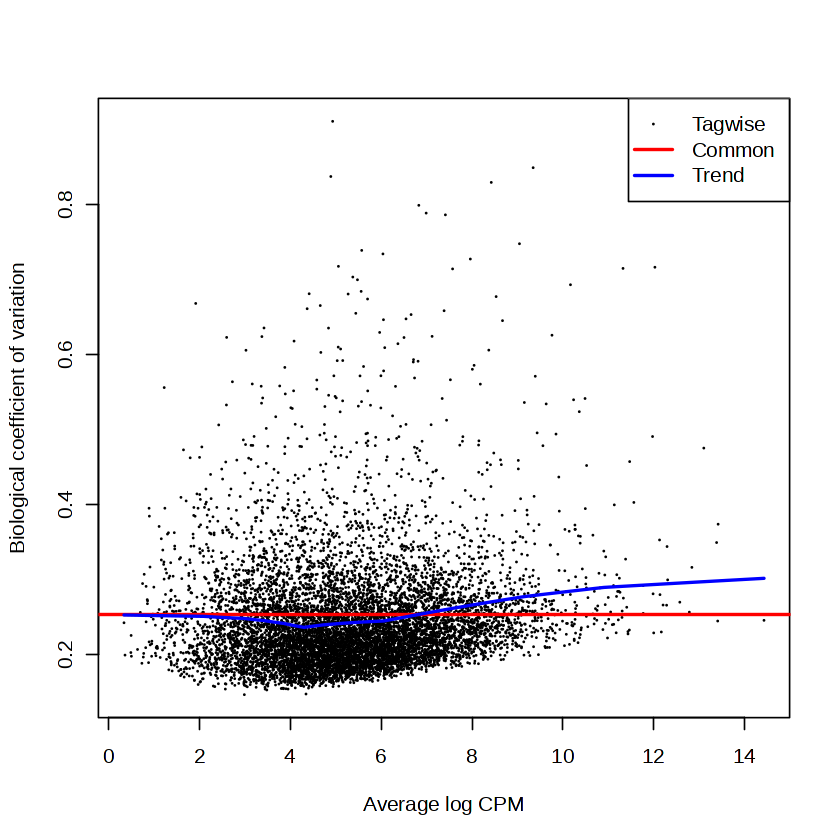

In [13]:
DEGs <- estimateDisp(DEGs, design = design)
DEGs$common.dispersion
plotBCV(DEGs)

fit <- glmQLFit(DEGs, design = design)
qlf <- glmQLFTest(fit)
tt <- topTags(qlf, n = Inf)
summary(decideTests(qlf))

#et <- exactTest(DEGs)
#et_FDR <- topTags(et, n = nrow(et$table), adjust.method = "BH", sort.by = "PValue", p.value = 1)

#out_temp <- et_FDR$table
#colnames(out_temp) <-paste("AD1.1_canonical",colnames(out_temp),sep="_")

In [14]:
head(tt)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NQO1,2.6492180,6.314072,67.37661,9.401806e-07,0.008568806
LIME1,-1.3123583,6.346188,48.42083,6.290526e-06,0.028665929
SRXN1,1.6014705,3.981995,41.34632,1.494247e-05,0.031568681
KRT7,1.4117856,7.959997,40.57821,1.652496e-05,0.031568681
KLF2,-2.6863484,5.238607,39.82727,1.825974e-05,0.031568681
JAK3,-0.8956571,6.413298,38.86949,2.078254e-05,0.031568681


In [15]:
write.table(tt$table, file='./DEG-skin-layer.xls',quote=F,sep="\t")